# Titanic: Machine Learning from Disaster

$Description: $ 

## Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
df_sub = pd.read_csv("../data/gender_submission.csv")

## Exploratory Data Analysis (EDA)

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


I will built the model on df_train dataset. Then after training and test the model using this dataset I will predict new values of Survived target on the df_test dataset. Let's start !! :)

In [6]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df_train.shape

(891, 12)

## Feature Engineering

First one I will split df_train for training and testing datasets. On training dataset I will create new features and build the model and on testing dataset I will use the same functions to create features like on training dataset and check the performence of the model. 

Before split I use PassengerId like index variable. In my opinion PassengerId isn't necessary feature to increase performence the model - it's great feature for index my data.

In [8]:
df_train.set_index('PassengerId', inplace=True)

In [9]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Right now I split my dataset into training and testing data. 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df_train.drop(['Survived'], axis=1)
y = df_train.loc[:, 'Survived']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
print('Shape of training features: ', X_train.shape)
print('Shape of testing features: ', X_test.shape)
print('Shape of training target: ', y_train.shape)
print('Shape of testing target: ', y_test.shape)

Shape of training features:  (623, 10)
Shape of testing features:  (268, 10)
Shape of training target:  (623,)
Shape of testing target:  (268,)


In [14]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

I have 10 columns. Let's check what are the type of them.

In [15]:
X_train.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Half of my features are numeric - Pclass, Age, SibSp, Parch, Fare. In my opinion Pclass, SibSp and Parch aren't numerical features - it will be better for model to convert it to categorical variables. I do the same with features: Sex and Embarked. Moreover I will round Fare feature to only 2 decimal places - it's weird that someone pay 71.2833 pounds. The best for me is to create function for those calculation, because I wil have to repeat that things later on testing dataset. Let's do this !!

In [16]:
def convert_features(data):
    df = data.copy()
    df['Pclass'] = df['Pclass'].astype('category') 
    df['SibSp'] = df['SibSp'].astype('category')
    df['Parch'] = df['Parch'].astype('category')
    df['Sex'] = df['Sex'].astype('category')
    df['Embarked'] = df['Embarked'].astype('category')
    df['Fare'] = df['Fare'].round(2)
    return df

In [17]:
X_train = convert_features(X_train)

In [18]:
X_train.dtypes

Pclass      category
Name          object
Sex         category
Age          float64
SibSp       category
Parch       category
Ticket        object
Fare         float64
Cabin         object
Embarked    category
dtype: object

In [19]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
446,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.86,A34,S
651,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.90,NaN,S
173,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.13,NaN,S
451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.75,NaN,S
315,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.25,NaN,S


In [20]:
X_train.describe()

,Age,Fare
count,499.000000,623.000000
mean,29.256353,31.840867
std,14.558567,51.027356
min,0.420000,0.000000
25%,20.000000,7.920000
50%,28.000000,14.450000
75%,38.000000,30.750000
max,80.000000,512.330000


Above we see some weird number like 0.42 age or 0 pounds fare. Let's check it !!

In [21]:
X_train[X_train.Age <= 1]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
173,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.13,NaN,S
165,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.69,NaN,S
382,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.74,NaN,C
645,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.26,NaN,C
828,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.00,NaN,C
470,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.26,NaN,C
184,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.00,F4,S
789,3,"Dean, Master. Bertram Vere",male,1.00,1,2,C.A. 2315,20.58,NaN,S
387,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.90,NaN,S


We see that we have some child which didn't had 1 year old. I think that after normalization that kinds of data wouldn't have a big influence to our model.

### Name feature

Now let's see on Name feature. We see that there are some names, surnames but also titles like Miss, Mr or Master. May be it will be important for our model. Of course titles like Mr. or Miss. are in Sex variable but Master is something else. Let's try to find there some pattern !!

In [194]:
df_name = X_train.Name.str.split(",", expand=True).rename(columns = lambda x: f"Part_Name_{x+1}")
df_name_2 = df_name.Part_Name_2.str.split(".", expand=True).rename(columns = lambda x: f"Part_Name_{x+1}")

In [195]:
df_name.head()

,Part_Name_1,Part_Name_2
PassengerId,,
446,Dodge,Master. Washington
651,Mitkoff,Mr. Mito
173,Johnson,Miss. Eleanor Ileen
451,West,Mr. Edwy Arthur
315,Hart,Mr. Benjamin


In [196]:
df_name.rename(columns={"Part_Name_1":"Surname", "Part_Name_2":"Title_Name"}, inplace=True)

In [197]:
df_name.head()

,Surname,Title_Name
PassengerId,,
446,Dodge,Master. Washington
651,Mitkoff,Mr. Mito
173,Johnson,Miss. Eleanor Ileen
451,West,Mr. Edwy Arthur
315,Hart,Mr. Benjamin


In [198]:
df_name_2.head()

,Part_Name_1,Part_Name_2,Part_Name_3
PassengerId,,,
446,Master,Washington,None
651,Mr,Mito,None
173,Miss,Eleanor Ileen,None
451,Mr,Edwy Arthur,None
315,Mr,Benjamin,None


In [199]:
df_name_2.rename(columns = {"Part_Name_1":"Title", "Part_Name_2":"Surname", "Part_Name_3":"Rest"}, inplace=True)

In [200]:
df_name_2.Title.unique()

array([' Master', ' Mr', ' Miss', ' Mrs', ' Col', ' Mlle', ' Rev', ' Dr',
       ' Capt', ' Mme', ' Ms', ' the Countess', ' Lady'], dtype=object)

We see that all of this title have whitespaces. Let's remove them.

In [201]:
df_name_2['Title'] = df_name_2.Title.str.strip()
df_name_2['Surname'] = df_name_2.Surname.str.strip()
df_name_2['Rest'] = df_name_2.Rest.str.strip()

In [202]:
df_name_2.head()

,Title,Surname,Rest
PassengerId,,,
446,Master,Washington,None
651,Mr,Mito,None
173,Miss,Eleanor Ileen,None
451,Mr,Edwy Arthur,None
315,Mr,Benjamin,None


In [203]:
df_name_2.Title.unique()

array(['Master', 'Mr', 'Miss', 'Mrs', 'Col', 'Mlle', 'Rev', 'Dr', 'Capt',
       'Mme', 'Ms', 'the Countess', 'Lady'], dtype=object)

In [204]:
df_name_2.Title.value_counts()

Mr              368
Miss            125
Mrs              82
Master           31
Dr                4
Rev               4
Mlle              2
Col               2
Capt              1
the Countess      1
Ms                1
Mme               1
Lady              1
Name: Title, dtype: int64

We see that on the ship were some people with title different from Mr or Miss. In my opinion titles like: Mr, Miss, Mrs, Master, Ms we can drop. Rest of them may be important in my model. Let's check it in some visualization. 

In [206]:
normal_titles = ('Mr', 'Miss', 'Mrs', 'Master', 'Ms')
unusual_titles = ('Dr', 'Rev', 'Mlle', 'Col', 'Capt', 'the Countess', 'Mme', 'Lady')

In [214]:
df_plot = pd.merge(df_name_2, pd.DataFrame(y_train), how='inner', left_on='PassengerId', right_on='PassengerId') 
df_plot['NormalTitle'] = df_plot.Title.isin(normal_titles).astype(int)

In [216]:
df_plot.head()

,Title,Surname,Rest,Survived,NormalTitle
PassengerId,,,,,
446,Master,Washington,None,1,1
651,Mr,Mito,None,0,1
173,Miss,Eleanor Ileen,None,1,1
451,Mr,Edwy Arthur,None,0,1
315,Mr,Benjamin,None,0,1


In [241]:
pd.DataFrame(y_train).Survived.value_counts()

0    392
1    231
Name: Survived, dtype: int64

In [240]:
df_plot.groupby(['NormalTitle', 'Survived']).agg({'Survived':['count']})

Survived
                        count
NormalTitle Survived         
0           0               9
            1               7
1           0             383
            1             224

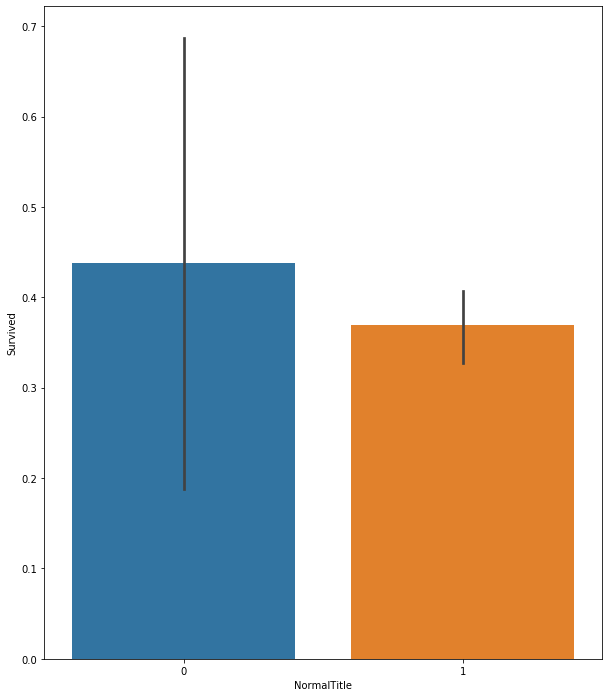

In [242]:
plt.figure(figsize = (10, 12))
sns.barplot(x='NormalTitle', y='Survived', data=df_plot)

In [249]:
df_name_2.Rest.unique()

array([None, 'Barrett)'], dtype=object)

In [250]:
df_name_2

,Title,Surname,Rest
PassengerId,,,
446,Master,Washington,None
651,Mr,Mito,None
173,Miss,Eleanor Ileen,None
451,Mr,Edwy Arthur,None
315,Mr,Benjamin,None
...,...,...,...
107,Miss,Anna Kristine,None
271,Mr,Alexander,None
861,Mr,Claus Peter,None


Summarizing column Name isn't so important. I think that the best feature which i can pull from it is feature NormalTitle like  I show above. Rest of column isn't important - in my opinion of course. Let's create function with all of operation which I've done above :)

In [268]:
def feature_engineering_name(data):
    
    # Copy input dataset
    df = data.copy()
    
    # Split Name feature into several columns
    df_name = df.Name.str.split(",", expand=True).rename(columns = lambda x: f"Part_Name_{x+1}")
    df_name_2 = df_name.Part_Name_2.str.split(".", expand=True).rename(columns = lambda x: f"Part_Name_{x+1}")
    
    # Rename new features and remove whitespaces
    df_name_2.rename(columns = {"Part_Name_1":"Title"}, inplace=True)
    df_name_2['Title'] = df_name_2.Title.str.strip()
    
    # Create vector with normal titles
    normal_titles = ('Mr', 'Miss', 'Mrs', 'Master', 'Ms')
    
    # Create new variables 
    df_name_2['NormalTitle'] = df_name_2.Title.isin(normal_titles).astype(int)
    df_name_2 = df_name_2.loc[:, ['NormalTitle']]
    
    df = pd.merge(df, df_name_2, how="inner", on="PassengerId")
    return df

In [269]:
feature_engineering_name(X_train)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NormalTitle
PassengerId,,,,,,,,,,,
446,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.86,A34,S,1
651,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.90,NaN,S,1
173,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.13,NaN,S,1
451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.75,NaN,S,1
315,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.25,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.65,NaN,S,1
271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.00,NaN,S,1
861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.11,NaN,S,1


### Ticket feature

In [281]:
X_train.Ticket.unique()

array(['33638', '349221', '347742', 'C.A. 34651', 'F.C.C. 13529',
       'PC 17582', 'C.A. 31921', '343276', '2223', 'SC/PARIS 2131',
       '17421', '28213', '315151', 'SOTON/O.Q. 3101307', 'PC 17611',
       'LINE', 'SC/PARIS 2133', '3101295', '330959', 'W./C. 6607',
       '230080', '348124', '367232', '2653', '2678', 'STON/O 2. 3101280',
       '17463', '36568', 'SC/Paris 2123', '2680', '7552', '363291',
       '17453', 'C.A. 33112', 'C.A. 29566', 'SOTON/OQ 392089', '11765',
       'A/4 48871', 'A/5. 3337', '113800', '233866', '113767', '11668',
       'SC/PARIS 2146', '349249', '364511', 'C.A. 31026', 'PP 9549',
       '223596', '349909', '113510', 'SOTON/O.Q. 392078', '13507',
       'A/4. 39886', 'W./C. 14258', 'STON/O2. 3101290', '350417',
       '382649', 'W./C. 6608', '370377', '2672', '2695', '345763',
       '234686', '28403', '113059', '113572', '250644', '349239',
       '248731', 'C.A. 2673', 'A/5. 2151', '347077', '65306', '330979',
       '349234', 'PC 17603', '349224'

### Logistic Regression

## Modelling

## Testing